# Solving the Optical Bloch Equations

    __1_
     |
     |  Ω
     |
    __0_

In [1]:
field_dict = {'coupled_levels':[[0,1]], 'rabi_freq': 5.0, 'rabi_freq_t_func': 'square', 
              'rabi_freq_t_args': { 'ampl': 1.0, 'on': 0.2, 'off': 0.8}} # [2π MHz]

In [2]:
decay_dict = {'channels': [[0,1]], 'rate':1.0}

In [3]:
from maxwellbloch import ob_atom
ob_two = ob_atom.OBAtom(num_states=2, fields=[field_dict], decays=[decay_dict])

In [4]:
import numpy as np
tlist = np.linspace(0., 1., 201) # [µs]

In [5]:
import qutip as qu
ob_two.mesolve(tlist, show_pbar=True, opts=qu.Options(max_step=0.1))

10.4%. Run time:   0.00s. Est. time left: 00:00:00:00
20.4%. Run time:   0.01s. Est. time left: 00:00:00:00
30.3%. Run time:   0.02s. Est. time left: 00:00:00:00
40.3%. Run time:   0.03s. Est. time left: 00:00:00:00
50.2%. Run time:   0.03s. Est. time left: 00:00:00:00
60.2%. Run time:   0.04s. Est. time left: 00:00:00:00
70.1%. Run time:   0.04s. Est. time left: 00:00:00:00
80.1%. Run time:   0.04s. Est. time left: 00:00:00:00
90.0%. Run time:   0.05s. Est. time left: 00:00:00:00
Total run time:   0.05s


Result object with mesolve data.
--------------------------------
states = True
num_collapse = 0

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 1)

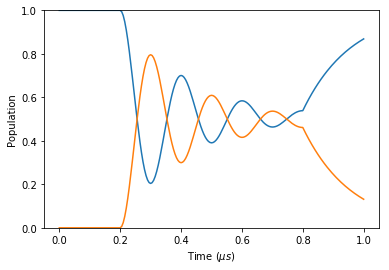

In [7]:
pop_0 = np.absolute(ob_two.states_t()[:,0,0]) # Ground state population
pop_1 = np.absolute(ob_two.states_t()[:,1,1]) # Excited state population

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tlist, pop_0, label='Excited state')
ax.plot(tlist, pop_1, label='Ground state')
ax.set_xlabel(r'Time ($\mu s$)')
ax.set_ylabel(r'Population')
ax.set_ylim([0.,1])